# Wrap Up Quiz


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/ames_housing_no_missing.csv"

ames_housing = pd.read_csv(url, na_filter=False) # required for pandas > 2.0

ames_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


`ames_housing` is pandas df, the column "SalePrice" contains the target variable. To simplify we only use numerical columns defined below

In [2]:
target_name = "SalePrice"
data = ames_housing.drop(columns = target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]
data_numerical = data[numerical_features]


## Question 1
We will compare the generalization performance of a decision tree and a linear regression. For this purpose, we create two separate predictive models and evaluate them by 10-fold cross-validation.

Thus, use s`klearn.linear_model.LinearRegression` and `sklearn.tree.DecisionTreeRegressor` to create the models. Use the default parameters for the linear regression and set `random_state=0` for the decision tree.

Be aware that a linear model requires to scale numerical features. Please use `sklearn.preprocessing.StandardScaler` so that your linear regression model behaves the same way as the quiz author intended 

A linear model is better than a single decision tree for 9 folds among 10 folds.


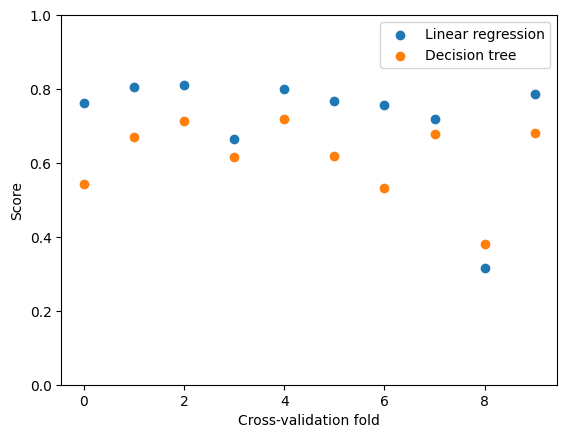

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

linear_regression = make_pipeline(StandardScaler(), LinearRegression())
tree = DecisionTreeRegressor(random_state=2)

cv_results_lr = cross_validate(
    linear_regression, data_numerical, target, cv=10, return_estimator=True, n_jobs=2
)
scores_lr = cv_results_lr["test_score"]

cv_results_tree = cross_validate(
    tree, data_numerical, target, cv=10, return_estimator=True, n_jobs=2
)
scores_tree = cv_results_tree["test_score"]

indices = np.arange(len(scores_lr))
plt.scatter(indices, scores_lr, label="Linear regression")
plt.scatter(indices, scores_tree, label="Decision tree")
plt.ylim((0,1))
plt.xlabel("Cross-validation fold")
plt.ylabel("Score")
plt.legend()
print(f"A linear model is better than a single decision tree for {sum(scores_lr > scores_tree)} folds among 10 folds.")

## Question 2
Instead of using the default parameters for the decision tree regressor, we can optimize the `max_depth` of the tree. Vary the `max_depth` from 1 level up to 15 levels. Use nested cross-validation to evaluate a grid-search (`sklearn.model_selection.GridSearchCV`). Set `cv=10` for both the inner and outer cross-validations.

In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {"max_depth": np.arange(1, 16)}
search = GridSearchCV(tree, params, cv=10)
cv_results_tree_optimal_depth = cross_validate(search, data_numerical, target, cv=10, return_estimator=True, n_jobs=2)
cv_results_tree_optimal_depth["test_score"].mean()

np.float64(0.6909853446444225)

We can inspect the trees trained during the cross-validation to find the values of the max_depth parameter.

In [11]:
for search_cv in cv_results_tree_optimal_depth["estimator"]:
    print(search_cv.best_params_)

{'max_depth': np.int64(5)}
{'max_depth': np.int64(7)}
{'max_depth': np.int64(14)}
{'max_depth': np.int64(5)}
{'max_depth': np.int64(6)}
{'max_depth': np.int64(7)}
{'max_depth': np.int64(6)}
{'max_depth': np.int64(5)}
{'max_depth': np.int64(5)}
{'max_depth': np.int64(6)}


## Question 3

Now, we want to evaluate the generalization performance of the decision tree while taking into account the fact that we tune the depth for this specific dataset. Use the grid-search as an estimator inside a `cross_validate` to automatically tune the `max_depth` parameter on each cross-validation fold.

A linear model is better than a tree with tuned depth for 8 folds among 10 folds.


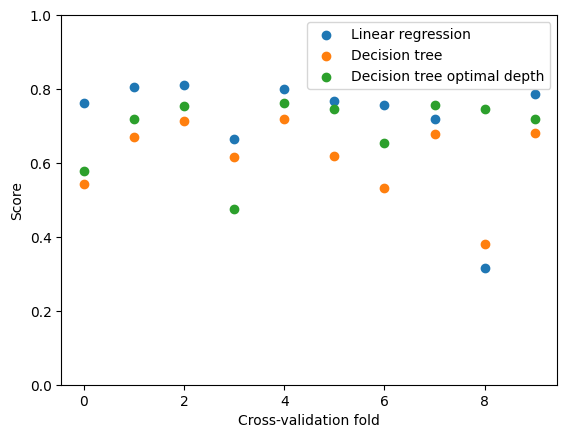

In [22]:
score_tree_optimal = cv_results_tree_optimal_depth["test_score"]
plt.scatter(indices, scores_lr, label="Linear regression")
plt.scatter(indices, scores_tree, label="Decision tree")
plt.scatter(indices, score_tree_optimal, label="Decision tree optimal depth")
plt.ylim((0,1))
plt.xlabel("Cross-validation fold")
plt.ylabel("Score")
plt.legend()
print(f"A linear model is better than a tree with tuned depth for {sum(scores_lr > score_tree_optimal)} folds among 10 folds.")

In [23]:
print(
    "A tree with an optimized depth is better than linear regression for "
    f"{sum(score_tree_optimal > scores_lr)} CV "
    "iterations out of 10 folds."
)

A tree with an optimized depth is better than linear regression for 2 CV iterations out of 10 folds.


## Question 4
Instead of using only the numerical features, now use the entire dataset as available in the variable `data`.

Create a preprocessor by dealing separately with the numerical and categorical columns. columns. For the sake of simplicity, we assume the following:
- categorical columns can be selected if they have an `object` data type;
- use an `OrdinalEncoder` to encode the categorical columns;
- numerical columns should correspond to the numerical_features as defined above.
In addition, set the `max_depth` of the decision tree to `7` (fixed, no need to tune it with a grid-search).

Evaluate this model using `cross_validate` as in the previous questions.

A tree model trained with both numerical and categorical features

In [38]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_columns = selector(dtype_include=object)(data)

preprocessor = ColumnTransformer(
    [('num', StandardScaler(), data_numerical.columns), 
     ('cat', OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1), cat_columns)]
)

model = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=2, max_depth=7))
cv_results_tree_all = cross_validate(model, data, target, cv=10, return_estimator=True, n_jobs=2)

scores_tree_all = cv_results_tree_all["test_score"]
print(f"A tree trained with both numerical and categorical features is better than a tree using only numerical features for {sum(scores_tree_all > scores_tree)} folds among 10 folds.")

A tree trained with both numerical and categorical features is better than a tree using only numerical features for 10 folds among 10 folds.


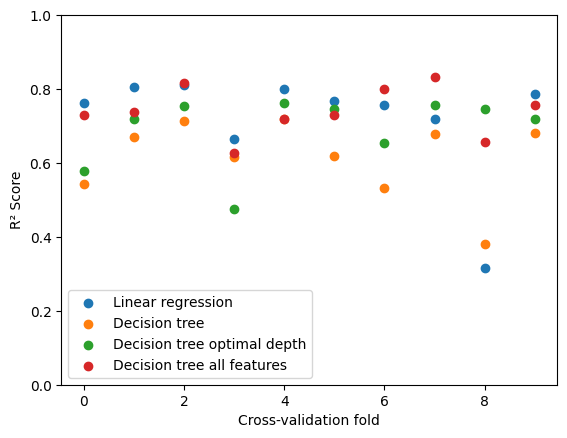

In [39]:
plt.scatter(indices, scores_lr, label="Linear regression")
plt.scatter(indices, scores_tree, label="Decision tree")
plt.scatter(indices, score_tree_optimal, label="Decision tree optimal depth")
plt.scatter(indices, scores_tree_all, label="Decision tree all features")
plt.ylim((0,1))
plt.xlabel("Cross-validation fold")
plt.ylabel("R² Score")
plt.legend()